In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In c:\users\iguru\documents\venv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In c:\users\iguru\documents\venv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\iguru\documents\venv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In c:\users\iguru\documents\venv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\iguru\documents\venv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [34]:
feature_columns = """acc_x acc_y acc_z gyr_x gyr_y gyr_z mag_x mag_y mag_z orient_w orient_x orient_y orient_z grav_x 
grav_y grav_z lin_acc_x lin_acc_y lin_acc_z pressure ignore ignore""".split()

label_columns = ["Coarse", "Fine", "Road", "Traffic", "Tunnels", "Social", "Food"]

coarse_label_mapping = "Null Still Walking Run Bike Car Bus Train Subway".split()

label_column = "Coarse"

In [52]:
# # TODO: Отрисовать данные за один временой интервал, но source и target файлы. они реально так сильно отличаются?

# xh = np.load("C:/Users/iguru/Documents/GitHub/ml-adv/ts-uda/data/shl-3users-target/070717/Hand_Motion.npy")
# xh.shape

# xt = np.load("C:/Users/iguru/Documents/GitHub/ml-adv/ts-uda/data/shl-3users-target/070717/Torso_Motion.npy")
# xt.shape

# y = np.load("C:/Users/iguru/Documents/GitHub/ml-adv/ts-uda/data/shl-3users-target/070717/Torso_Motion_labels.npy")
# y.shape

(3857, 9, 500)

In [69]:
X = pd.read_csv("./data/raw/070717/Hips_Motion.txt", sep=' ', header=None, names=["Time(ms)"] + feature_columns)
X.set_index(pd.to_datetime(X['Time(ms)'], unit='ms'), inplace=True)

# 3. select columns
X = X.iloc[:, 1:10]  # Only [acc_x acc_y acc_z gyr_x gyr_y gyr_z mag_x mag_y mag_z] columns
X_col = list(X.columns)

Y = pd.read_csv("./data/raw/070717/Label.txt", sep=' ', header=None, names=["Time(ms)"] + label_columns)
Y.set_index(pd.to_datetime(Y['Time(ms)'], unit='ms'), inplace=True)

XX = pd.read_csv("./data/raw/070717/Torso_Motion.txt", sep=' ', header=None, names=["Time(ms)"] + feature_columns)
XX.set_index(pd.to_datetime(XX['Time(ms)'], unit='ms'), inplace=True)

# 3. select columns
XX = XX.iloc[:, 1:10]  # Only [acc_x acc_y acc_z gyr_x gyr_y gyr_z mag_x mag_y mag_z] columns


Y = pd.DataFrame(Y[label_column])

In [70]:
set(Y.values.flatten()) # Null Still Walking Run Car Bus - respectively

{0, 1, 2, 3, 5, 6}

In [89]:
len(Y), len(X), len(XX)

(3897101, 3897101, 3897101)

In [90]:
X = X.values
XX = XX.values
Y = Y.values

In [115]:
indices = {}
for i, cls in enumerate(Y.flatten()[50000:], 50000):
    if not cls in indices:
        indices[cls] = i

In [116]:
indices

{0: 50000, 2: 87850, 3: 297931, 1: 645838, 6: 2127848, 5: 3198858}

In [117]:
XX.shape

(3897101, 9)

Null


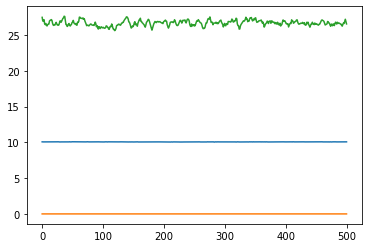

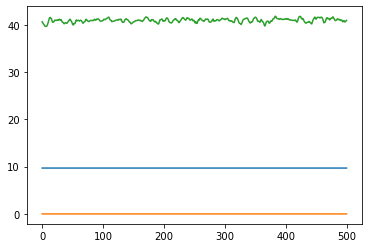

Walking


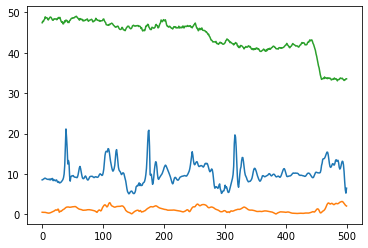

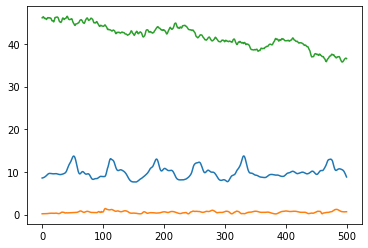

Run


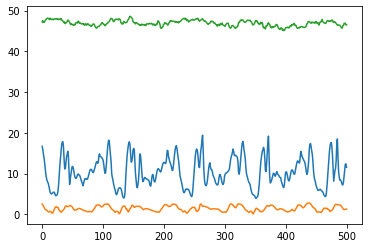

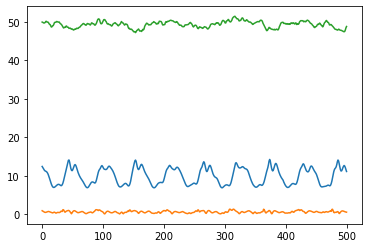

Still


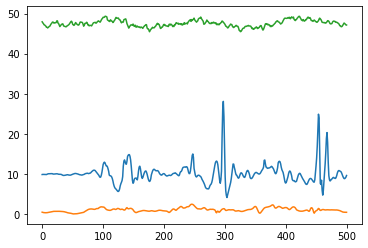

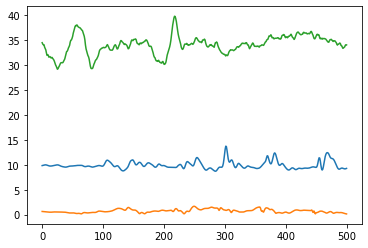

Bus


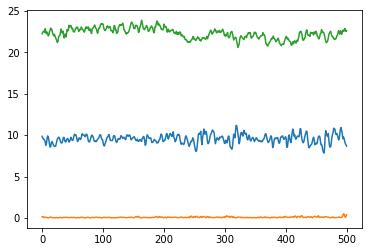

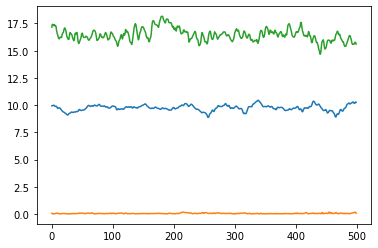

Car


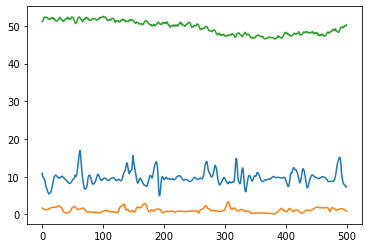

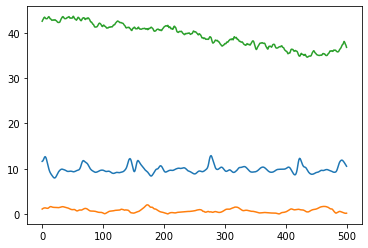

In [118]:
import math

def xyz_to_amplitude(x):
    assert len(x) == 3, len(x)
    return math.sqrt(x[0]**2 + x[1]**2 + x[2]**2)

def imu_to_amplitude(x):
    assert len(x) == 9, len(x)
    res = []
    for i in range(3):
        res.append(xyz_to_amplitude(x[i*3:(i+1)*3]))
    return np.array(res)

for cls, i in indices.items():
    print(coarse_label_mapping[cls])
    plt.plot(list(map(imu_to_amplitude, X[i:i+500])))
    plt.show()
    plt.plot(list(map(imu_to_amplitude, XX[i:i+500])))
    plt.show()
    